# Сергей Лагов ИУ8-82 Вар 5, День рождения 9.10
=> фигура = (5 mod 4) + 1 = 2 (квадрат)
=> цвет = (9 mod 3) + 1 = 1 (желтый)

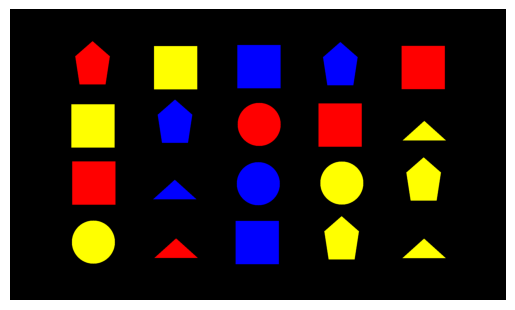

In [598]:
import pprint
import random
import cv2
import numpy as np
from enum import Enum
from matplotlib import pyplot as plt

WIDTH, HEIGHT = 2304, 1350
COLORS = [(0, 255, 255), (255, 0, 0), (0, 0, 255)]

X_DISTANCE, Y_DISTANCE = 384, 270
CENTERS = [(X_DISTANCE * i, Y_DISTANCE * j) for i in range(1, 6) for j in range(1, 5)]
SHIFT_RANGE = 5
CENTERS = list(map(lambda point: tuple(map(lambda x: x + random.randint(-SHIFT_RANGE, SHIFT_RANGE), list(point))), CENTERS))
random.shuffle(CENTERS)

class SHAPE(Enum):
    CIRCLE = 1
    SQUARE = 2
    TRIANGLE = 3
    PENTAGON = 4
    
SHAPES = [SHAPE.SQUARE, SHAPE.CIRCLE, SHAPE.TRIANGLE, SHAPE.PENTAGON]
    
image = np.zeros((HEIGHT, WIDTH, 3), dtype=np.uint8)


def draw_figure(image, color, shape, center):
    if shape == SHAPE.CIRCLE:
        r = 100
        cv2.circle(image, center, r, color, -1)
        return
    
    if shape == SHAPE.TRIANGLE:
        A, B, C = 20, 100, 70
        points = np.array([[center[0], center[1] - A],
                           [center[0] + B, center[1] + C],
                           [center[0] - B, center[1] + C]], np.int32)
        cv2.fillPoly(image, [points], color)
        return
    
    if shape == SHAPE.PENTAGON:
        A, B, C, D = 120, 80, 60, 50
        points = np.array([[center[0], center[1] - A],
                           [center[0] + B, center[1] - D],
                           [center[0] + C, center[1] + B],
                           [center[0] - C, center[1] + B],
                           [center[0] - B, center[1] - D]], np.int32)
        cv2.fillPoly(image, [points], color)
        return
    
    if shape == SHAPE.SQUARE:
        A = 100
        points = np.array([[center[0] - A, center[1] - A],
                           [center[0] + A, center[1] - A],
                           [center[0] + A, center[1] + A],
                           [center[0] - A, center[1] + A]], np.int32)
        cv2.fillPoly(image, [points], color)
        return 

i = 0
for shape in SHAPES:
    for color in COLORS:
        draw_figure(image, color, shape, CENTERS[i])
        i += 1

while i < len(CENTERS):
    draw_figure(image, random.choice(COLORS), random.choice(SHAPES), CENTERS[i])
    i += 1
    
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


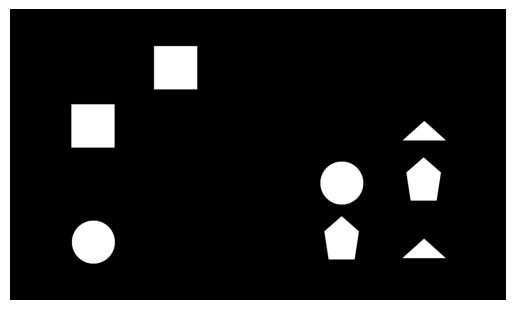

In [599]:
yellow_lower = np.array([0, 250, 220])
yellow_higher = np.array([0, 255, 255])

mask = cv2.inRange(image, yellow_lower, yellow_higher)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

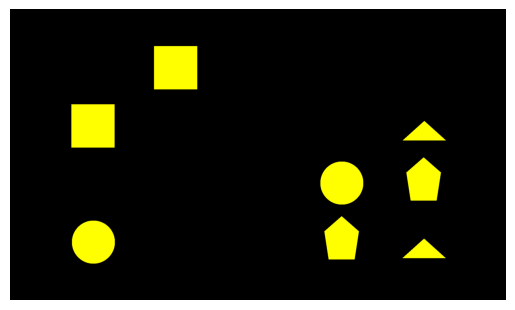

In [600]:
selection = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(cv2.cvtColor(selection, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

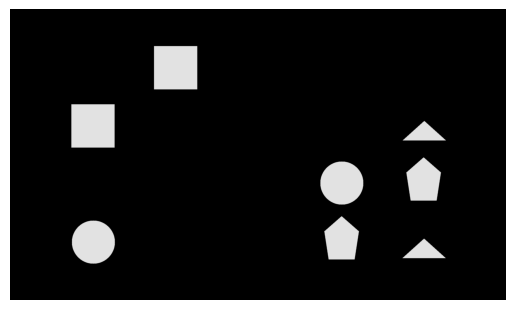

In [601]:
gray = cv2.cvtColor(selection, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

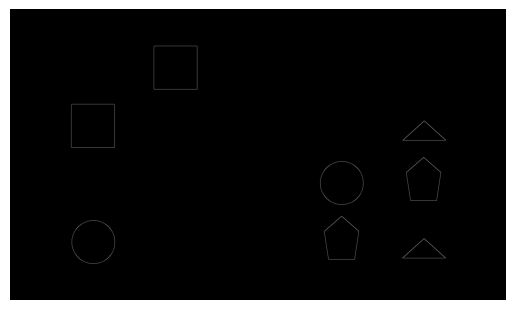

In [602]:
canny = cv2.Canny(gray, 90, 100)
plt.imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

contors 8


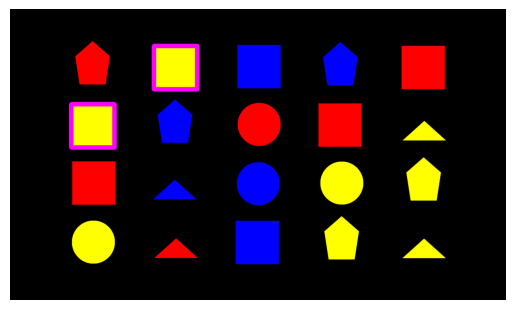

In [603]:
MAGENTA = (255, 0, 255)
THICKNESS = 20


contours_on_image = cv2.findContours(canny.copy(), # чб, черный фон, белые фигуры
                            cv2.RETR_EXTERNAL, # только внешние контуры
                            cv2.CHAIN_APPROX_SIMPLE # метод аппроксимации
                            )[0]


COLORS2 = [(113, 104, 228), (180, 195, 182), (86, 221, 149), (22, 95, 160), (29, 32, 169)]
print(f'contors {len(contours_on_image)}')

SEARCH_FOR_ANGLES = 4
for contor in contours_on_image:
    contor_length = cv2.arcLength(contor, True) # — вычисление длины дуги
    
    contor_is_closed = True
    # Approximate Polygon Douglasa-Peuckera
    apd = cv2.approxPolyDP(contor, contor_length * 0.02, contor_is_closed) # вычисление количества углов

    if len(apd) != SEARCH_FOR_ANGLES:
        continue
    cv2.drawContours(image, [contor], -1, MAGENTA, THICKNESS)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()